<a href="https://colab.research.google.com/github/Narasinghadev/mlproject/blob/main/Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
 # Data Collection and Data Processing

 quality_dataset = pd.read_csv('/content/quality.csv')


In [50]:
quality_dataset.shape

(1599, 12)

In [51]:
quality_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
quality_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
  # Checking the missing values
  quality_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


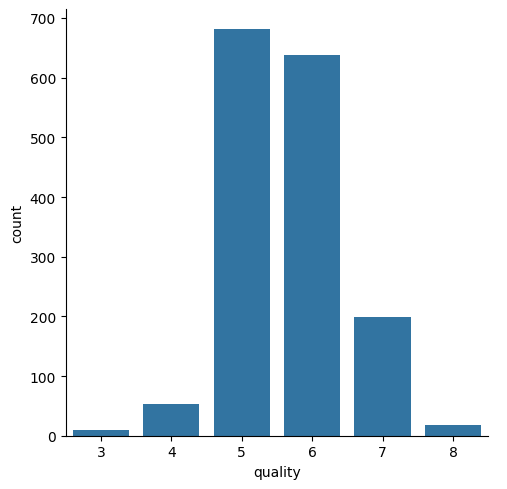

In [54]:
 # Data Visulaizuation

 sns.catplot(x='quality', data = quality_dataset, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

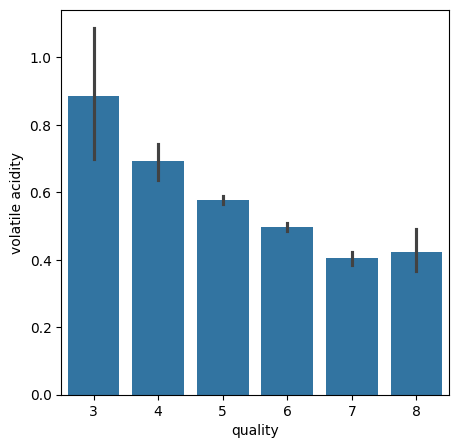

In [55]:
 # Finding the Correlearation between the parmeters

  # Volatile Acidity and Quality


plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'volatile acidity', data = quality_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

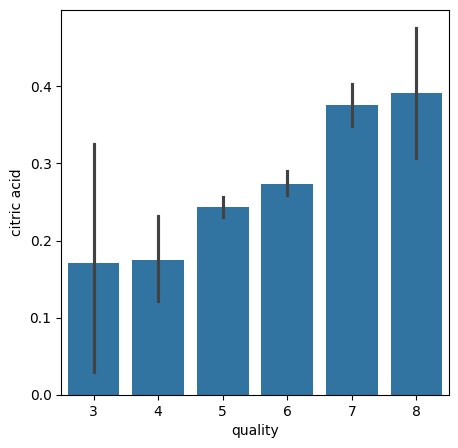

In [56]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid', data = quality_dataset)

In [57]:
 # Find the Correleration

 correleration = quality_dataset.corr()

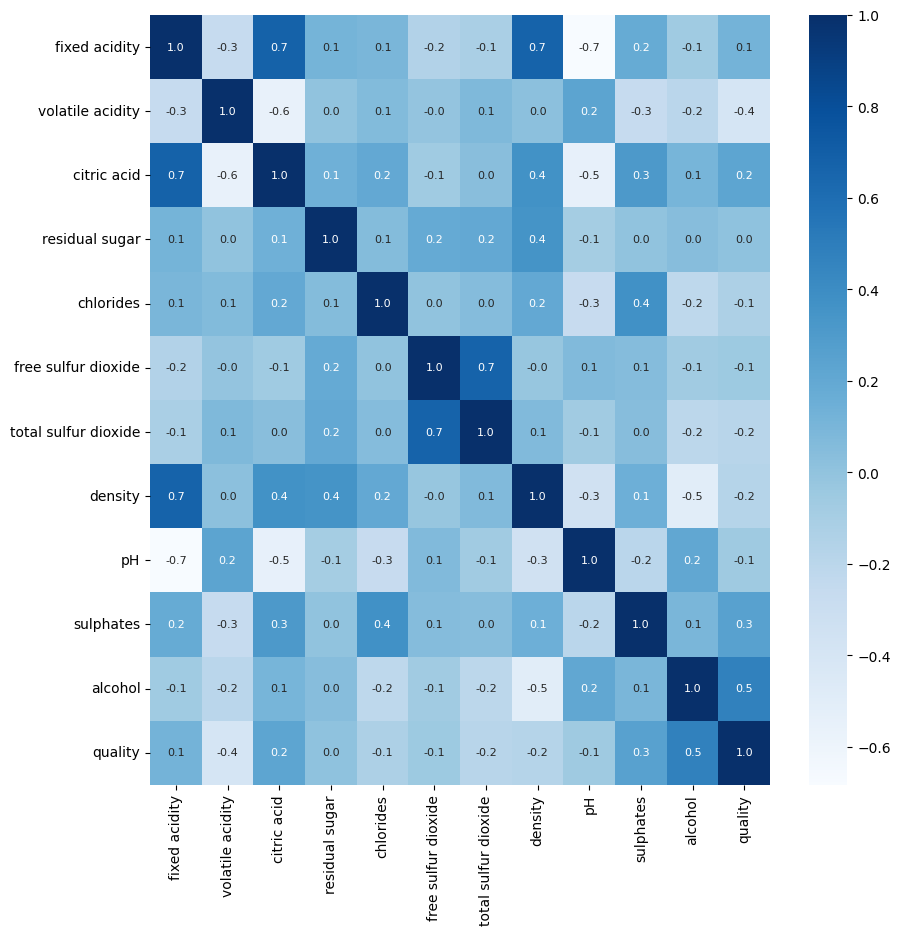

In [58]:
 # Construct a heat map to understand the correlaeration between different parameters

plt.figure(figsize=(10, 10))
sns.heatmap(correleration, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [59]:
X=quality_dataset.drop('quality', axis=1)

In [60]:
Y = quality_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)


In [61]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [63]:
classifier = RandomForestClassifier()

In [64]:
model = classifier.fit(X_train, Y_train)

In [65]:
 # Predicting the results of the model
 X_test_prediction = model.predict(X_test)

 test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [66]:
print(test_data_accuracy)

0.925


In [71]:
 # Build a Predictive System


input_data = (8,0.67,0.02,1.8,0.05,5.0,11.0,0.9962,3.48,0.52,9.5)

  # Change the data to the numpy array
Provided_data = np.asarray(input_data)

  #Reshape the Data

new_data_reshape = Provided_data.reshape(1,-1)

new_data_prediction = model.predict(new_data_reshape)
print(new_data_prediction)

if (new_data_prediction[0]==1):
  print('Good')

else:
  print('Bad')

[0]
Bad


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
